In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, data, filters, color, morphology
from skimage.segmentation import flood, flood_fill
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects, skeletonize, area_closing, thin
from skimage.filters import threshold_otsu

In [115]:
img = io.imread('data/kl5-s3.png')[400:1000, 400:1000, :3]
gt = io.imread('data/kl5-s3-gt.jpeg')[400:1000, 400:1000]
gray = color.rgb2gray(img)

In [116]:
def expand_wide_fractures_gt(img, gt, min_width=5, gt_ext='png'):
    gray = color.rgb2gray(img)
    thresh = threshold_otsu(gray)
    binary = gray <= thresh
    print(f'Otsu\'s threshold is {thresh}')
    binary_cln = remove_small_objects(binary)
    binary_clz = area_closing(binary_cln, area_threshold=64)
    binary_thn = thin(binary_clz, max_num_iter=min_width)
    binary_cln_2 = remove_small_objects(binary_thn)
    if 'tif' in gt_ext:
        new_gt = np.array(gt*255, dtype=np.uint8) | np.array(binary_cln_2*255, dtype=np.uint8)
    else:
        new_gt = np.array(gt, dtype=np.uint8) | np.array(binary_cln_2*255, dtype=np.uint8)
    return new_gt

Otsu's threshold is 0.431640625


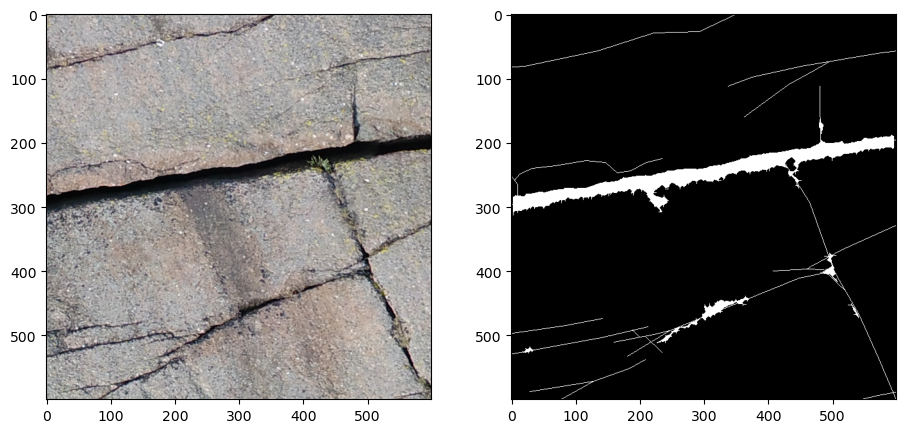

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].imshow(img)
axs[1].imshow(expand_wide_fractures_gt(img, gt, min_width=3), cmap='gray')

Otsu's threshold is 0.447265625


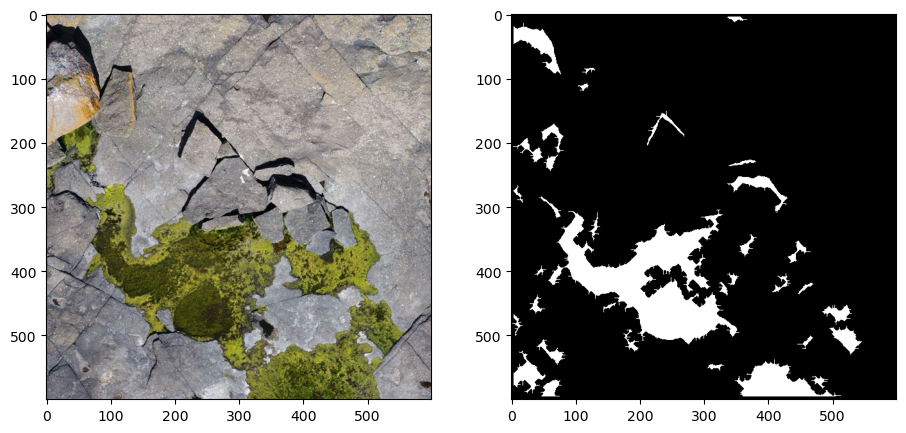

In [30]:
img = io.imread('data/OG1_sample_3 Large.jpeg')[400:1000, 400:1000, :3]
# did not look up the gt for this one :/
gt = io.imread('data/OG1_sample_3 Large.jpeg')[400:1000, 400:1000, 0]
gray = color.rgb2gray(img)

fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].imshow(img)
axs[1].imshow(expand_wide_fractures_gt(img, gt, min_width=4), cmap='gray')

Otsu's threshold is 0.6380823299632353


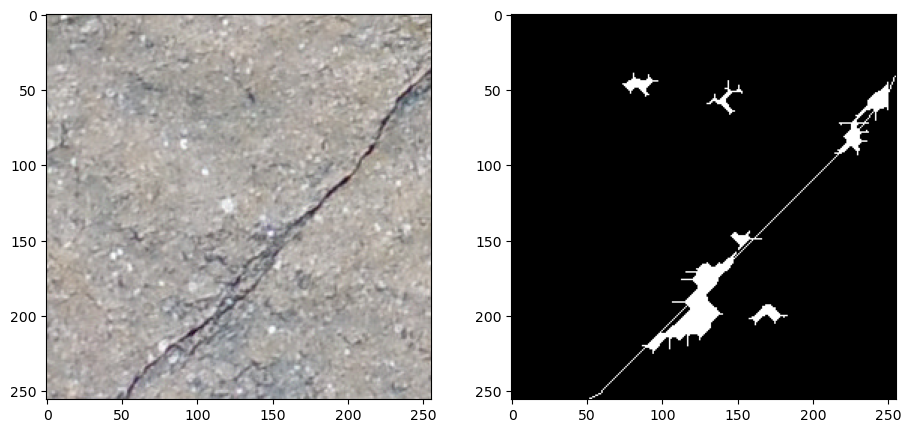

In [106]:
img = io.imread('data/ovask24/OG1_23_74.png')[:, :, :3]
gt = io.imread('data/ovask24/gtOG1_23_74.png')[:, :, 0]
gray = color.rgb2gray(img)

fig, axs = plt.subplots(1, 2, figsize=(11, 5))
axs[0].imshow(img)
axs[1].imshow(expand_wide_fractures_gt(img, gt, min_width=5), cmap='gray')

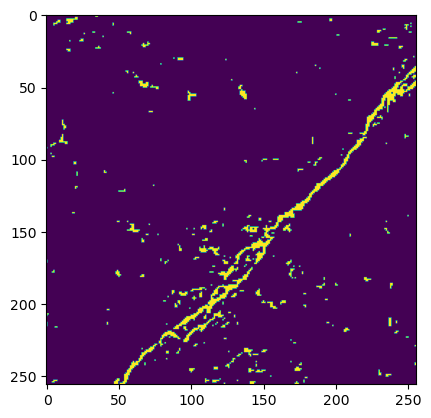

In [34]:
plt.imshow(gray<.5)

Otsu's threshold is 90.73677062988281
Otsu's threshold is 103.32299041748047
Otsu's threshold is 101.6324691772461
Otsu's threshold is 94.89093780517578


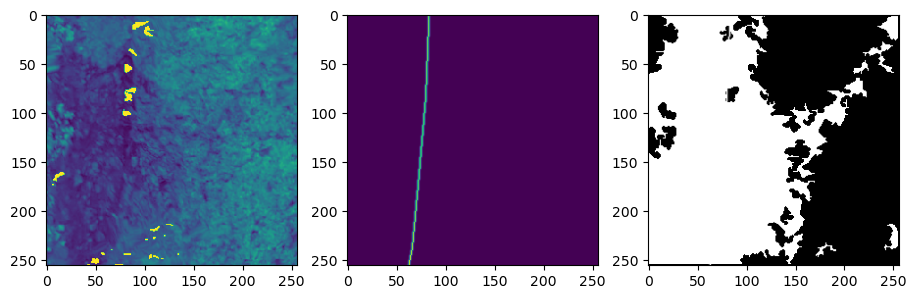

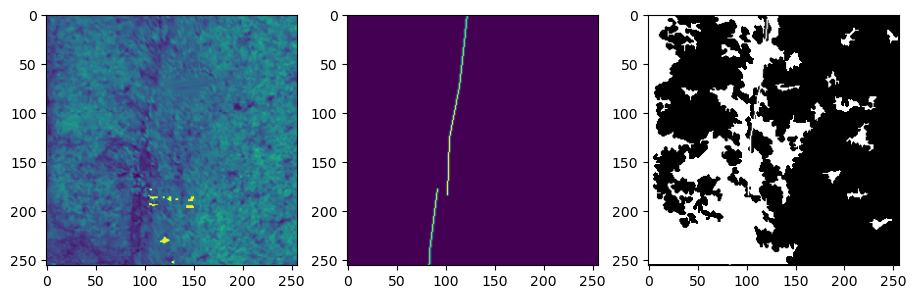

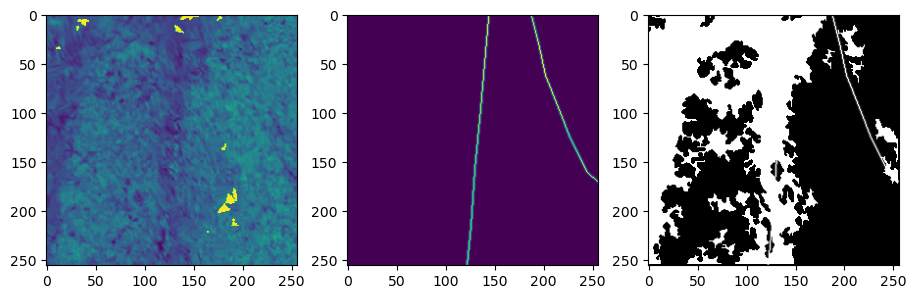

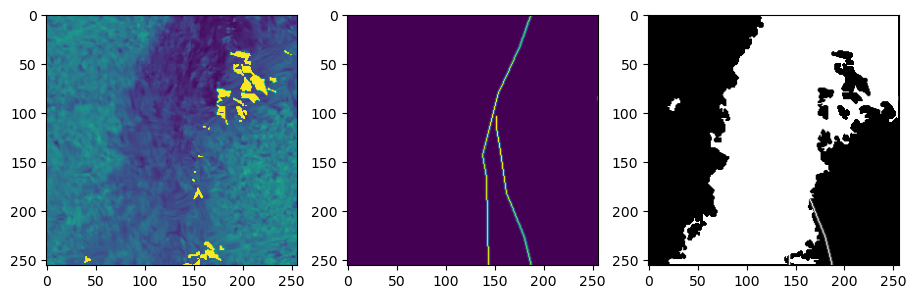

In [118]:
for i in range(126, 130):
    img = io.imread(f'data/train_matteo/image/Site_A_{i}.tif')[:, :, :3]
    gt = io.imread(f'data/train_matteo/gt/Site_A_{i}.tif')
    gray = color.rgb2gray(img)
    
    fig, axs = plt.subplots(1, 3, figsize=(11, 5))
    axs[0].imshow(img[:, :, 0])
    axs[1].imshow(gt)
    axs[2].imshow(expand_wide_fractures_gt(img, gt, min_width=1, gt_ext='tif'), cmap='gray')

In [53]:
img.max(), img.min()

(255.0, 8.0)

In [25]:
from ipywidgets import widgets

def show(img, size=4):
    fig, ax = plt.subplots(1, 1, figsize=(size, size))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()

@widgets.interact(x=(0, 1, .01))
def threshold(x):
    show(gray < x, size=7)

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0, step=0.01), Output()), _dom_classes=('w…

In [92]:
gt_skeleton = gt
gray = color.rgb2gray(img)

# Prepare output mask (binary)
expanded_mask = np.zeros_like(gray, dtype=bool)

# Define intensity threshold for flood (e.g., allow flooding below this value)
flood_threshold = 50

# Get seed coordinates from skeleton
seed_points = np.argwhere(gt_skeleton)

# Flood from each seed point
for y, x in seed_points:
    flooded_region = flood(gray, (y, x))
    expanded_mask |= flooded_region  # accumulate flood results

expanded_mask += np.array(gt, dtype='bool')

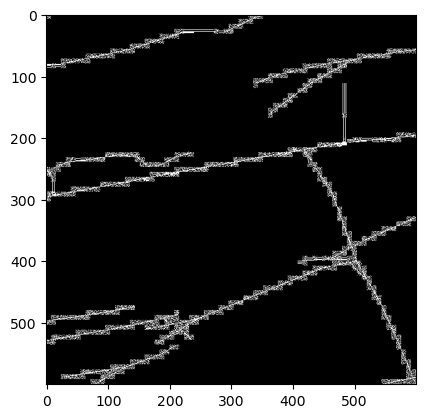

In [93]:
plt.imshow(expanded_mask, cmap='gray')

In [77]:
len(seed_points)

15947

In [78]:
expanded_mask.min(), expanded_mask.max()

(False, True)